<a href="https://colab.research.google.com/github/vasanthk99/Data_Science_Project/blob/main/supermarket_sales_prediction_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas, numpy
import os
from IPython.display import display, HTML
import datetime, calendar
from plotly import express
import plotly.graph_objects as go
import matplotlib.pyplot as slspl, seaborn as sestk
from sklearn import metrics, decomposition, model_selection, pipeline,preprocessing, feature_selection, linear_model
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
SlsDf=pandas.read_csv("/content/Amazon Sale Report.csv")
SlsDf.head()

<ipython-input-2-591ab9c0057a>:1: DtypeWarning: Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.
  SlsDf=pandas.read_csv("/content/Amazon Sale Report.csv")


,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,NaN,False,NaN,NaN


In [ ]:
def ClnCov(sls):
    print("==========================================")
    print("      Data Infomation")
    print("==========================================")
    print(sls.info())
    print("===================================================")
    print("Missing Values Before Cleaning")
    print("===================================================")
    print(sls.isnull().sum())
    smcov=sum(sls.isnull().sum())
    if smcov>0:
        covob=sls.dtypes[sls.dtypes=='object'].index.tolist()
        covnm=sls.dtypes[sls.dtypes!='object'].index.tolist()
        if sum(sls.isna().sum())!=0:
            for x in covob:
                sls[x]=sls[x].fillna(sls[x].mode()[0])
            for y in covnm:
                sls[y]=sls[y].fillna(sls[y].mean())
        print("===================================================")
        print("      Missing Values (After Cleaning)")
        print("===================================================")
        print(sls.isnull().sum())
    else:
        print("===================================================")
        print("      Data has no Missing Values ")
        print("===================================================")
    return sls
SlsDfMS=ClnCov(SlsDf)

      Data Infomation
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128975 entries, 0 to 128974
Data columns (total 24 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128975 non-null  int64  
 1   Order ID            128975 non-null  object 
 2   Date                128975 non-null  object 
 3   Status              128975 non-null  object 
 4   Fulfilment          128975 non-null  object 
 5   Sales Channel       128975 non-null  object 
 6   ship-service-level  128975 non-null  object 
 7   Style               128975 non-null  object 
 8   SKU                 128975 non-null  object 
 9   Category            128975 non-null  object 
 10  Size                128975 non-null  object 
 11  ASIN                128975 non-null  object 
 12  Courier Status      122103 non-null  object 
 13  Qty                 128975 non-null  int64  
 14  currency            121180 non-null  object 
 15  Amount      

<ipython-input-3-663528ebc4f7>:16: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  sls[x]=sls[x].fillna(sls[x].mode()[0])


In [ ]:
def CovDates(sls):
    sldf="Date"
    slmn=[]
    for x in range(1,13):
        slmn.append(calendar.month_name[x])
    dts_sls=sls[sldf].tolist()
    slmn,slmn1=[],[]
    dates_sls=[]
    year_sls=[]
    idx_months=[]
    new_features=['Year','Days','Month(Num)','Months']
    for d in dts_sls:
        spl=d.split("-")
        year_sls.append(int("20"+spl[2]))
        slmn.append(int(spl[0]))
        slmn1.append(calendar.month_name[int(spl[0])])
        dates_sls.append(int(spl[1]))
    for m in slmn:
        idx_months.append(slmn[m-1])
    try:
        sls.insert(1,new_features[0],numpy.array(year_sls,str))
        sls.insert(2,new_features[1],dates_sls)
        sls.insert(3,new_features[2],idx_months)
        sls.insert(4,new_features[3],slmn1)
    except:
        pass
    #sls=sls.drop('Date',axis=1)
    return sls
SlsDfNew=CovDates(SlsDfMS)
SlsDfNew.head()

,index,Year,Days,Month(Num),Months,Order ID,Date,Status,Fulfilment,Sales Channel,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
0,0,2022,30,4,April,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,Easy Ship,False
1,1,2022,30,4,April,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,False
2,2,2022,30,4,April,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,Easy Ship,False
3,3,2022,30,4,April,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,Easy Ship,False
4,4,2022,30,4,April,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,Easy Ship,False


EDA


<ipython-input-5-a8406bc8eaae>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  SlsDfNew['Date'] = pandas.to_datetime(SlsDfNew['Date'])


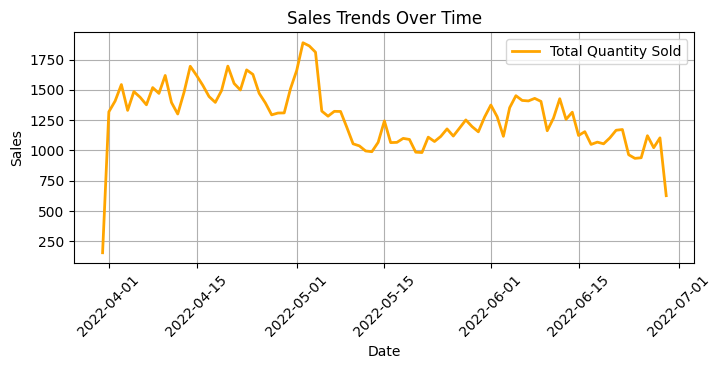

In [ ]:
SlsDfNew['Date'] = pandas.to_datetime(SlsDfNew['Date'])
daily_sales = SlsDfNew.groupby('Date').agg(total_qty=('Qty', 'sum'), total_amount=('Amount', 'sum')).reset_index()
slspl.figure(figsize=(8, 3))
sestk.lineplot(data=daily_sales, x='Date', y='total_qty', label='Total Quantity Sold', color='orange', linewidth=2)
slspl.title('Sales Trends Over Time')
slspl.xlabel('Date')
slspl.ylabel('Sales')
slspl.xticks(rotation=45)
slspl.legend()
slspl.grid(True)
slspl.show()

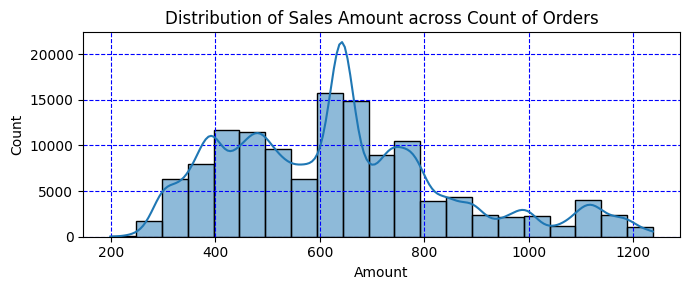

In [ ]:
RangeIntQ = SlsDfNew['Amount'].quantile(0.75) - SlsDfNew['Amount'].quantile(0.25)
UB = SlsDfNew['Amount'].quantile(0.75) + 1.5*RangeIntQ
LB = SlsDfNew['Amount'].quantile(0.25) - 1.5*RangeIntQ

ValMdn = SlsDfNew['Amount'].median()
SlsDfNew['Amount'] = SlsDfNew['Amount'].apply(lambda x: ValMdn if x > UB  or x < LB else x)
SlsDfNew['Amount'] = SlsDfNew['Amount'].apply(lambda x: ValMdn if x == 0 else x)

fig, my_ax = slspl.subplots(figsize=(7,3))

sestk.histplot(data = SlsDfNew['Amount'], ax=my_ax, binwidth=50, kde=True)
slspl.grid(linestyle='--',color='b')
slspl.title("Distribution of Sales Amount across Count of Orders")
slspl.tight_layout()

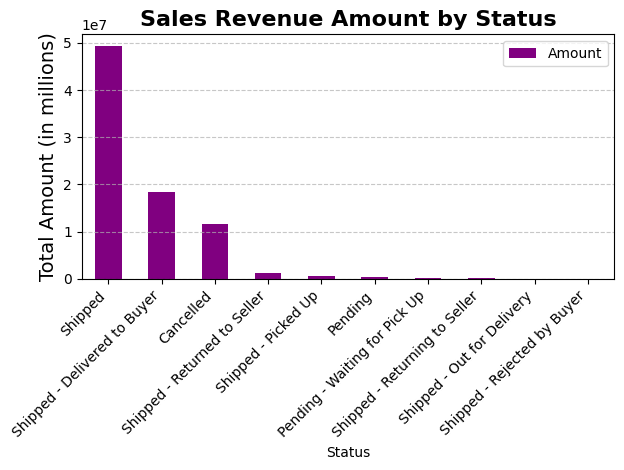

,Amount
Status,
Shipped,4.932226e+07
Shipped - Delivered to Buyer,1.832535e+07
Cancelled,1.159243e+07
Shipped - Returned to Seller,1.243692e+06
Shipped - Picked Up,6.500300e+05
Pending,4.198621e+05
Pending - Waiting for Pick Up,1.915550e+05
Shipped - Returning to Seller,1.019760e+05
Shipped - Out for Delivery,2.392700e+04


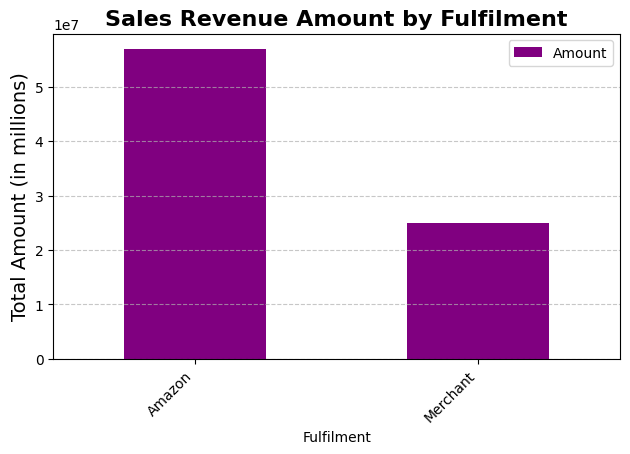

,Amount
Fulfilment,
Amazon,5.694300e+07
Merchant,2.494497e+07


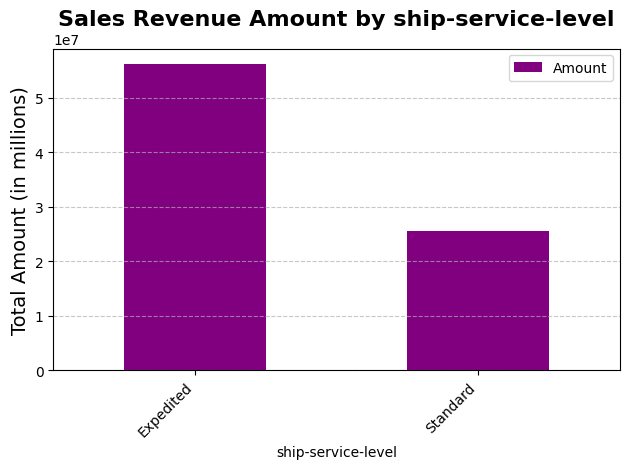

,Amount
ship-service-level,
Expedited,5.625559e+07
Standard,2.563238e+07


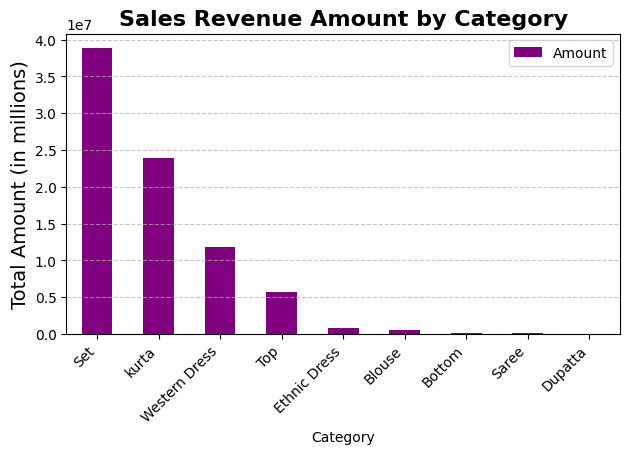

,Amount
Category,
Set,3.887499e+07
kurta,2.385903e+07
Western Dress,1.177063e+07
Top,5.746831e+06
Ethnic Dress,8.375007e+05
Blouse,5.009318e+05
Bottom,1.712592e+05
Saree,1.258848e+05
Dupatta,9.150000e+02


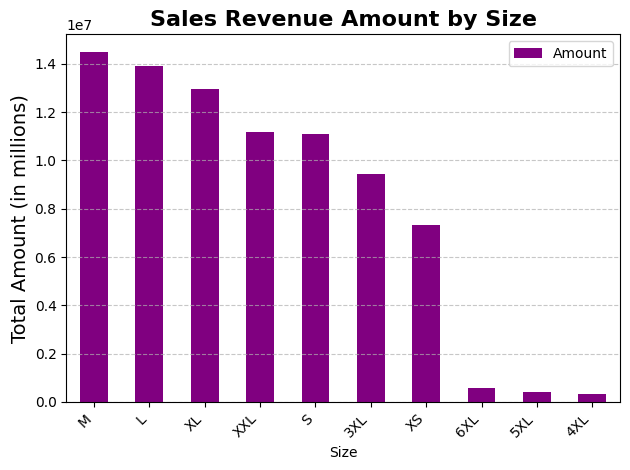

,Amount
Size,
M,1.449761e+07
L,1.390995e+07
XL,1.296513e+07
XXL,1.115897e+07
S,1.108872e+07
3XL,9.422034e+06
XS,7.324980e+06
6XL,5.614839e+05
5XL,4.178051e+05


In [ ]:
fetssls=['Status','Fulfilment','ship-service-level','Category','Size']
for f in range(len(fetssls)):
    SlsTops=SlsDfNew.groupby(fetssls[f])['Amount'].sum().to_frame().sort_values(by=['Amount'],ascending=False).head(10)
    SlsTops.plot(kind='bar',color='#800080')
    slspl.title('Sales Revenue Amount by {}'.format(fetssls[f]), fontsize=16, weight='bold')
    slspl.ylabel('Total Amount (in millions)', fontsize=14)
    slspl.grid(True, axis='y', linestyle='--', alpha=0.7)
    slspl.xticks(rotation=45, ha="right")
    slspl.legend()
    slspl.tight_layout()
    slspl.show()
    display(HTML(SlsTops.to_html()))

FEATURE ENCODING

In [ ]:
def DataEnc(sls):
    sls1=sls.copy()
    print("Feature Types Before Encoding")
    print(sls1.info())
    obsls=sls1.dtypes[sls1.dtypes=='object'].index.tolist()
    numsls=sls1.dtypes[sls1.dtypes!='object'].index.tolist()
    sls_objdf=sls1[obsls]
    sls_numdf=sls1[numsls]
    cols = sls_objdf.columns.tolist()
    sls_objdf[cols] = sls_objdf[cols].apply(preprocessing.LabelEncoder().fit_transform)
    sls1=pandas.concat([sls_numdf,sls_objdf],axis=1)
    if "Unnamed: 22" in sls1.columns:
        sls1=sls1.drop("Unnamed: 22",axis=1)
    print("Feature Types After Encoding")
    print(sls1.info())
    return sls1
SlsDfNew_encoded=DataEnc(SlsDfNew)
SlsDfNew_encoded.head()

Feature Types Before Encoding
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128975 entries, 0 to 128974
Data columns (total 28 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   index               128975 non-null  int64         
 1   Year                128975 non-null  object        
 2   Days                128975 non-null  int64         
 3   Month(Num)          128975 non-null  int64         
 4   Months              128975 non-null  object        
 5   Order ID            128975 non-null  object        
 6   Date                128975 non-null  datetime64[ns]
 7   Status              128975 non-null  object        
 8   Fulfilment          128975 non-null  object        
 9   Sales Channel       128975 non-null  object        
 10  ship-service-level  128975 non-null  object        
 11  Style               128975 non-null  object        
 12  SKU                 128975 non-null  object        
 13 

<ipython-input-8-7cf94133f986>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sls_objdf[cols] = sls_objdf[cols].apply(preprocessing.LabelEncoder().fit_transform)


,index,Days,Month(Num),Date,Qty,Amount,ship-postal-code,B2B,Year,Months,...,Category,Size,ASIN,Courier Status,currency,ship-city,ship-state,ship-country,promotion-ids,fulfilled-by
0,0,30,4,2022-04-30,0,647.62,400081.0,False,0,0,...,5,7,5563,1,0,4795,28,0,5766,0
1,1,30,4,2022-04-30,1,406.00,560085.0,False,0,0,...,8,0,5277,1,0,776,23,0,2051,0
2,2,30,4,2022-04-30,1,329.00,410210.0,True,0,0,...,8,8,675,1,0,5353,28,0,5766,0
3,3,30,4,2022-04-30,0,753.33,605008.0,False,0,0,...,7,5,4638,1,0,6140,43,0,5766,0
4,4,30,4,2022-04-30,1,574.00,600073.0,False,0,0,...,6,0,4351,1,0,1466,56,0,5766,0


OUTLIER DETECTION

In [ ]:
def OutVarSales(sls,v1):
    arrsls=numpy.array(sls.iloc[:,:-1])
    slspca = decomposition.PCA(n_components=2)
    slspca.fit(arrsls)
    explval=slspca.explained_variance_ratio_
    valm=max(explval.tolist())
    print(explval)
    cmp_slspca=["Comp-{}".format(i+1) for i in range(len(explval.tolist()))]
    slspl.figure(figsize=(5,3))
    valml="%.3f" % valm
    slspl.title("PCA Variance (Max: {})".format(max(explval.tolist())),fontsize=16)
    slspl.bar(cmp_slspca,explval.tolist(),width=0.5,color=v1)
    slspl.plot(explval.tolist(),"--yD")
    slspl.xlabel("Components",fontsize=14)
    slspl.ylabel("PCA Variance",fontsize=14)
    slspl.grid()
    slspl.show()
    return explval
def DataSalScl(sls):
    SCLMM = preprocessing.MinMaxScaler()
    slsscl=SCLMM.fit_transform(sls)
    return slsscl

[0.93359003 0.03530939]


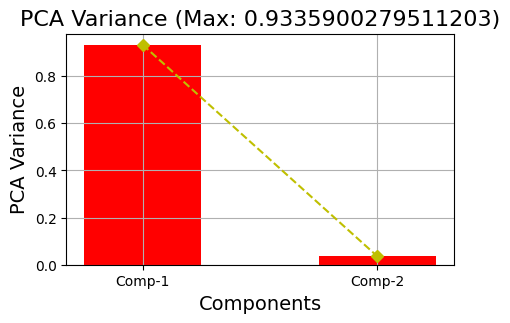

[0.30483793 0.13466289]


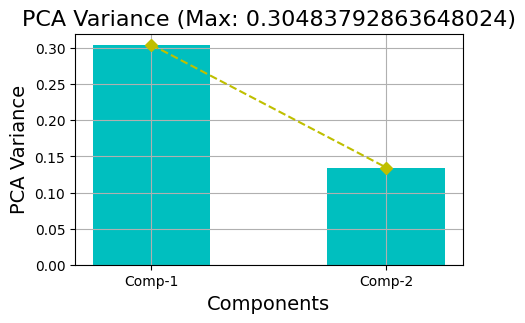

,index,Days,Month(Num),Qty,ship-postal-code,B2B,Year,Months,Order ID,Status,...,Size,ASIN,Courier Status,currency,ship-city,ship-state,ship-country,promotion-ids,fulfilled-by,Amount
0,0.000000,0.966667,0.0,0.000000,0.329675,0.0,0.0,0.0,0.585727,0.000000,...,0.7,0.773821,0.5,0.0,0.535515,0.411765,0.0,0.996543,0.0,647.620000
1,0.000008,0.966667,0.0,0.066667,0.511519,0.0,0.0,0.0,0.113103,0.416667,...,0.0,0.734038,0.5,0.0,0.086665,0.338235,0.0,0.354476,0.0,406.000000
2,0.000016,0.966667,0.0,0.066667,0.341187,1.0,0.0,0.0,0.376326,0.250000,...,0.8,0.093893,0.5,0.0,0.597833,0.411765,0.0,0.996543,0.0,329.000000
3,0.000023,0.966667,0.0,0.000000,0.562574,0.0,0.0,0.0,0.362877,0.000000,...,0.5,0.645152,0.5,0.0,0.685727,0.632353,0.0,0.996543,0.0,753.330000
4,0.000031,0.966667,0.0,0.066667,0.556965,0.0,0.0,0.0,0.748474,0.250000,...,0.0,0.605230,0.5,0.0,0.163726,0.823529,0.0,0.996543,0.0,574.000000
5,0.000039,0.966667,0.0,0.066667,0.103536,0.0,0.0,0.0,0.385630,0.250000,...,0.8,0.408958,0.5,0.0,0.279540,0.867647,0.0,0.996543,0.0,824.000000
6,0.000047,0.966667,0.0,0.066667,0.056865,0.0,0.0,0.0,0.938701,0.250000,...,0.5,0.233551,0.5,0.0,0.158030,0.147059,0.0,0.996543,0.0,653.000000
7,0.000054,0.966667,0.0,0.066667,0.443269,0.0,0.0,0.0,0.706871,0.416667,...,0.7,0.106969,0.5,0.0,0.324548,0.838235,0.0,0.372624,0.0,399.000000
8,0.000062,0.966667,0.0,0.000000,0.443242,0.0,0.0,0.0,0.800635,0.000000,...,0.0,0.262623,0.0,0.0,0.324548,0.838235,0.0,0.996543,0.0,648.561465
9,0.000070,0.966667,0.0,0.066667,0.556929,0.0,0.0,0.0,0.176828,0.250000,...,1.0,0.202532,0.5,0.0,0.189413,0.823529,0.0,0.996543,0.0,363.000000


In [ ]:
vramnt=[]
vramnt.append(OutVarSales(SlsDfNew_encoded.drop(['Date','Amount'],axis=1),"r"))

FlagVar=[]
for vr in vramnt:
    for v in vr:
        if v>0.8:
            FlagVar.append(True)
if len(FlagVar)==1 and True in FlagVar:
    NrmSls=DataSalScl(SlsDfNew_encoded.drop(['Date','Amount'],axis=1))
NrmSls=pandas.DataFrame(NrmSls,columns=SlsDfNew_encoded.drop(['Date','Amount'],axis=1).columns.tolist())
NrmSls['Amount']=SlsDfNew_encoded['Amount'].tolist()
OutVarSales(NrmSls.drop('Amount',axis=1),"c")
NrmSls.head(10)

FEATURE SELECTION

In [ ]:
def Func1(sls,nmst):
    secl="plasma"
    plst=len(sls)
    ttl_text="Correlation for {}".format(nmst)
    '''grpstk.figure(figsize=(14,8))
    grpstk.title(ttl_text,fontsize=25,color="b")
    sestk.heatmap(sls.corr(),fmt="0.2f",cmap=secl,annot=True).
    grpstk.show()'''
    corralldata=pandas.DataFrame(sls.corr()['Amount'])
    corralldata=corralldata.fillna(corralldata.mean())
    feats=corralldata.index.tolist()
    corralldata['Features']=feats
    corralldata.columns=["Coeff","Features"]
    corralldata=corralldata.reset_index(drop=True)
    slscorr=corralldata[(corralldata['Coeff']>0.01)|(corralldata['Coeff']>-0.01)].reset_index(drop=True)
    print("Selected Features Using Correlation: \n",*slscorr.Features.tolist(),sep="\n")
    print("---------------------------------------------------")
    print("     Total Features Selected Using Correlation: {}".format(len(slscorr.Features.tolist())))
    print("---------------------------------------------------")
    return slscorr.Features.tolist()
CorrSel=Func1(NrmSls, "Amazon Sales")

Selected Features Using Correlation: 

index
Days
Month(Num)
Qty
B2B
Year
Months
Order ID
Status
Fulfilment
Sales Channel 
ship-service-level
Style
SKU
ASIN
Courier Status
currency
ship-city
ship-state
ship-country
fulfilled-by
Amount
---------------------------------------------------
     Total Features Selected Using Correlation: 22
---------------------------------------------------


In [ ]:
pred_sls=NrmSls.drop(['Amount'],axis=1)
target_sls=NrmSls['Amount']
pred_sls1=pred_sls
MdRecurr=feature_selection.RFE(estimator=linear_model.LinearRegression(), verbose=1,
                               n_features_to_select=int(len(pred_sls.columns)*0.9),step=0.3)
MdRecurr.fit(pred_sls, target_sls)
print(MdRecurr.ranking_)
MdRecurr.feature_names_in_    #[MdRecurr.support_==True]
rankdf=pandas.DataFrame({"Features":MdRecurr.feature_names_in_,"Rank":MdRecurr.ranking_})
rankdf1=rankdf[rankdf['Rank']==1]
print("Selected Features Using RFE: \n",*rankdf1.Features,sep="\n")
print("--------------------------------------------------------------")
print("---------------------------------------------------")
print("     Total Features Selected Using RFE: {}".format(len(rankdf1.Features)))
print("---------------------------------------------------")
RFESel=rankdf1.Features.tolist()

Fitting estimator with 25 features.
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 2 1 2]
Selected Features Using RFE: 

index
Days
Month(Num)
Qty
ship-postal-code
B2B
Year
Months
Order ID
Status
Fulfilment
Sales Channel 
ship-service-level
Style
SKU
Category
Size
ASIN
Courier Status
ship-city
ship-state
promotion-ids
--------------------------------------------------------------
---------------------------------------------------
     Total Features Selected Using RFE: 22
---------------------------------------------------


In [ ]:
Features_Sales=[]
for ff in RFESel:
    if ff in CorrSel:
        Features_Sales.append(ff)

print("Selected Features Using Hybrid Approach (RFE+Correlation): {}".format(len(Features_Sales)))


       Selected Features Using Hybrid Approach (RFE+Correlation): 18


In [ ]:
SlsPred=NrmSls[Features_Sales]
SlsPred

,index,Days,Month(Num),Qty,B2B,Year,Months,Order ID,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,ASIN,Courier Status,ship-city,ship-state
0,0.000000,0.966667,0.0,0.000000,0.0,0.0,0.0,0.585727,0.000000,1.0,0.0,1.0,0.975291,0.971921,0.773821,0.5,0.535515,0.411765
1,0.000008,0.966667,0.0,0.066667,0.0,0.0,0.0,0.113103,0.416667,1.0,0.0,1.0,0.615552,0.616625,0.734038,0.5,0.086665,0.338235
2,0.000016,0.966667,0.0,0.066667,1.0,0.0,0.0,0.376326,0.250000,0.0,0.0,0.0,0.387355,0.365999,0.093893,0.5,0.597833,0.411765
3,0.000023,0.966667,0.0,0.000000,0.0,0.0,0.0,0.362877,0.000000,1.0,0.0,1.0,0.271076,0.245621,0.645152,0.5,0.685727,0.632353
4,0.000031,0.966667,0.0,0.066667,0.0,0.0,0.0,0.748474,0.250000,0.0,0.0,0.0,0.547965,0.533361,0.605230,0.5,0.163726,0.823529
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128970,0.999969,1.000000,0.0,0.066667,0.0,0.0,1.0,0.684674,0.250000,0.0,0.0,0.0,0.562500,0.549486,0.550981,0.5,0.324548,0.838235
128971,0.999977,1.000000,0.0,0.066667,0.0,0.0,1.0,0.238875,0.250000,0.0,0.0,0.0,0.982558,0.981512,0.950619,0.5,0.292607,0.279412
128972,0.999984,1.000000,0.0,0.066667,0.0,0.0,1.0,0.850910,0.250000,0.0,0.0,0.0,0.172238,0.139005,0.566421,0.5,0.324548,0.838235
128973,0.999992,1.000000,0.0,0.066667,0.0,0.0,1.0,0.197995,0.250000,0.0,0.0,0.0,0.087209,0.057548,0.183753,0.5,0.328122,0.264706


In [ ]:
fhfrh

In [ ]:
ghfhfd

In [ ]:
gfgfcx